In [1]:
import random
import numpy as np
from setuptools.namespaces import flatten
import matplotlib.pyplot as plt

In [2]:
while True:
    try:
        dim = int(input("Введите размерность матрицы: "))
        break
    except ValueError:
        print("Ошибка ввода. Необходимо ввести одно число")

matrix = [[int(random.random() * 100) for i in range(dim)] for j in range(dim)]
Y = [int(random.random() * 100) for _ in range(dim)]

print("\nМатрица случайных чисел")
for i in matrix:
    print(i)

Введите размерность матрицы: 4

Матрица случайных чисел
[90, 39, 9, 7]
[10, 73, 59, 80]
[72, 42, 42, 77]
[68, 83, 26, 94]


In [3]:
print("Вектор конечного потрбления: ")
print(Y)

Вектор конечного потрбления: 
[70, 84, 1, 5]


In [4]:
X = [sum(i) for i in matrix]

for i in range(dim):
    X[i] = X[i] + Y[i]

print("Вектор валового выпуска")
print(X)

Вектор валового выпуска
[215, 306, 234, 276]


In [5]:
A = [[round(matrix[i][j] / X[i], 2) for i in range(dim)] for j in range(dim)]

print("\nМатрица прямых затрах")
for i in A:
    print(i)


Матрица прямых затрах
[0.42, 0.03, 0.31, 0.25]
[0.18, 0.24, 0.18, 0.3]
[0.04, 0.19, 0.18, 0.09]
[0.03, 0.26, 0.33, 0.34]


In [6]:
H_prev = np.linalg.inv(np.eye(dim) - A)
H = [[round(H_prev[i][j]) for i in range(dim)] for j in range(dim)]

print("\nМатрица полных затрах")
for i in H:
    print(i)


Матрица полных затрах
[2, 1, 0, 1]
[1, 2, 1, 1]
[2, 1, 2, 2]
[2, 2, 1, 3]


In [7]:
for i in flatten(H):
    if i < 0:
        print("Матрица A не продуктивна т.к H < 0")
        break
    else:
        sign = True

w, v = (np.linalg.eig(A))
print("\nЧисло Фрабениуса:")
frab = max(w, key=abs)
print(frab)
print()

if frab < 1 and sign:
    print("Матрица A продуктивна, т.к Н > 0 и Число Фрабениуса < 1")
else:
    print("Матрица A не продуктивна т.к Число Фрабениуса > 1")



Число Фрабениуса:
(0.8151850750208278+0j)

Матрица A продуктивна, т.к Н > 0 и Число Фрабениуса < 1


In [8]:
new_y_lst = []
print("\nВведите через пробел номер отрасли (от 1 до рамерности матрцицы) и кол-во процентов,\nна которое хотите изменить конечное потребление в этой отрасли. Для окончания ввода нажмите q\n")

sign = True
digit_lst = []
while True:
    try:
        new_y = input()
        if new_y == "q":
            break
        new_y_int = list(map(int, new_y.split(" ")))
        if new_y_int[0] > dim or new_y_int[0] < 1:
            print("Номер отрасли не должен быть меньше 1 и больше кол-ва самих отраслей")
        elif len(new_y_int) != 2:
            print("Необходимо ввести 2 аргумента")
        else:
            for i in new_y_lst:
                if new_y_int[0] == i[0]:
                    print("Данная отрасль уже вписана")
                    break
                else:
                    new_y_lst.append(new_y_int)
                    digit_lst.append(new_y_int[0])
                    break
            if sign:  # для первого добвления
                new_y_lst.append(new_y_int)
                digit_lst.append(new_y_int[0])
                sign = False
    except ValueError:
        print("Ошибка ввода. Попробуйте еще раз")

digit_lst_full = []
for i in range(1, dim + 1):
    if i not in digit_lst:
        new_y_lst.append([i, 0])

Y1 = []
for i in new_y_lst:
    Y1.append(Y[i[0] - 1] * (1 + (i[1] / 100)))

print("\nИзменный вектор конечного потрбеления")
print(Y1)


Введите через пробел номер отрасли (от 1 до рамерности матрцицы) и кол-во процентов,
на которое хотите изменить конечное потребление в этой отрасли. Для окончания ввода нажмите q

1 25
3 35
q

Изменный вектор конечного потрбеления
[87.5, 1.35, 84.0, 5.0]


In [9]:
H = np.array(H)
X1 = H.dot(Y1)
print("Необходимый объем валового выпуска каждой отрасли")
print(X1)

Необходимый объем валового выпуска каждой отрасли
[181.35 179.2  354.35 276.7 ]


In [10]:
X_pure = []
x_lst = []
for i in range(dim):
    for j in range(dim):
        x_lst.append(A[j][i] * X1[i])
    X_pure.append(round(X1[i] - sum(x_lst), 2))

print("Чистая продукция")
print(X_pure)

Чистая продукция
[59.85, -71.33, -250.53, -599.34]


Все параметры модели: 

Матрица случайных чисел
[90, 39, 9, 7]
[10, 73, 59, 80]
[72, 42, 42, 77]
[68, 83, 26, 94]

Вектор конечного потрбления: 
[70, 84, 1, 5]

Вектор валового выпуска
[215, 306, 234, 276]

Матрица прямых затрах
[0.42, 0.03, 0.31, 0.25]
[0.18, 0.24, 0.18, 0.3]
[0.04, 0.19, 0.18, 0.09]
[0.03, 0.26, 0.33, 0.34]

Матрица полных затрах
[2 1 0 1]
[1 2 1 1]
[2 1 2 2]
[2 2 1 3]

Число Фрабениуса:
(0.8151850750208278+0j)

Матрица A продуктивна, т.к Н > 0 и Число Фрабениуса < 1

Изменный вектор конечного потрбеления
[87.5, 1.35, 84.0, 5.0]

Необходимый объем валового выпуска каждой отрасли
[181.35 179.2  354.35 276.7 ]


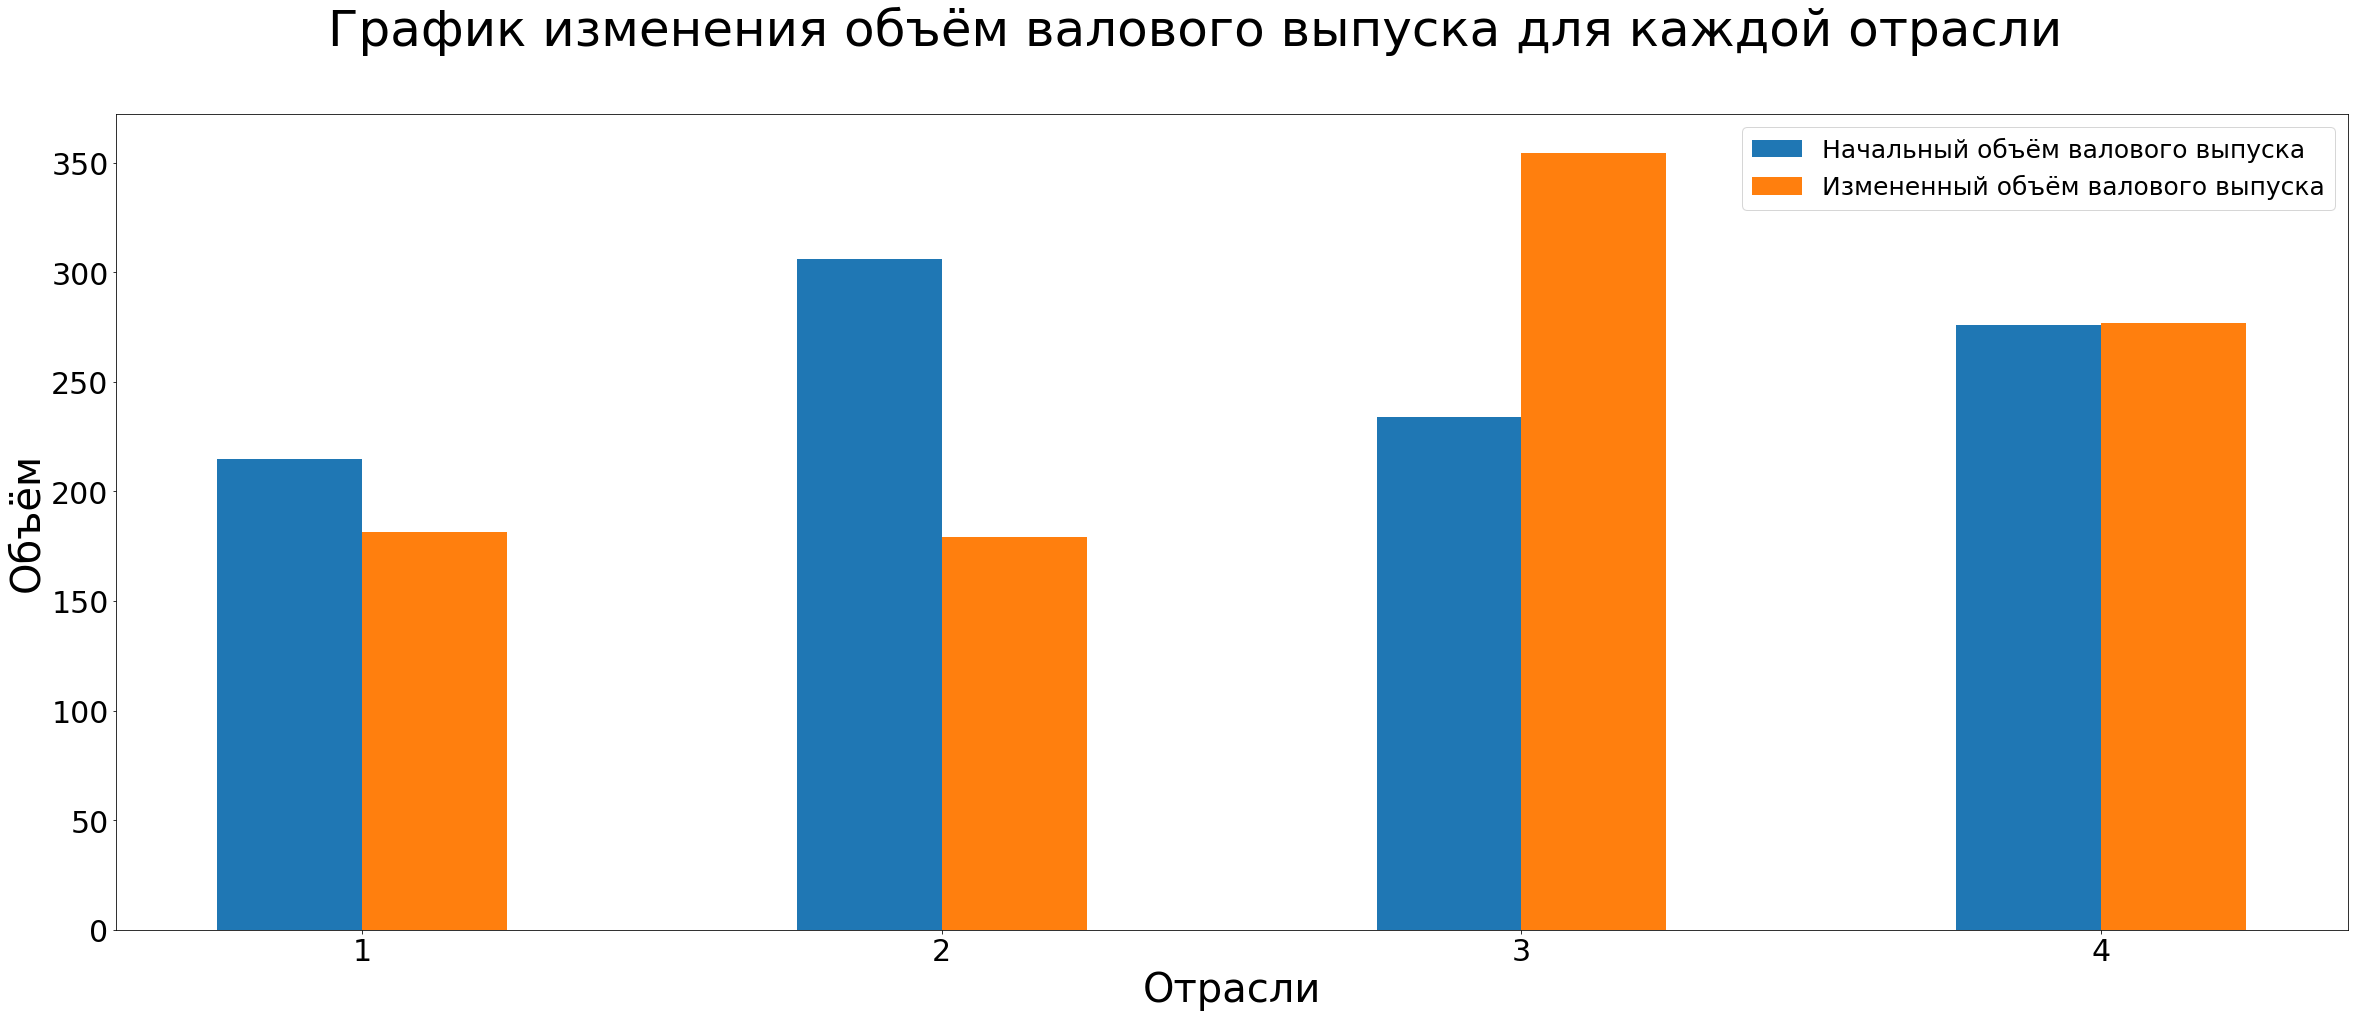

In [19]:
print("Все параметры модели: ")

print("\nМатрица случайных чисел")
for i in matrix:
    print(i)

print("\nВектор конечного потрбления: ")
print(Y)

print("\nВектор валового выпуска")
print(X)

print("\nМатрица прямых затрах")
for i in A:
    print(i)
    
print("\nМатрица полных затрах")
for i in H:
    print(i)
    
for i in flatten(H):
    if i < 0:
        print("Матрица A не продуктивна т.к H < 0")
        break
    else:
        sign = True

w, v = (np.linalg.eig(A))
print("\nЧисло Фрабениуса:")
frab = max(w, key=abs)
print(frab)
print()

if frab < 1 and sign:
    print("Матрица A продуктивна, т.к Н > 0 и Число Фрабениуса < 1")
else:
    print("Матрица A не продуктивна т.к Число Фрабениуса > 1")
    

print("\nИзменный вектор конечного потрбеления")
print(Y1)

print("\nНеобходимый объем валового выпуска каждой отрасли")
print(X1)

x = np.arange(1, len(X) + 1)

width = 0.25
fig, ax = plt.subplots(figsize=(40,15))

rects1 = ax.bar(x - width/2, X, width, label='Начальный объём валового выпуска')
rects2 = ax.bar(x + width/2, X1, width, label='Измененный объём валового выпуска')

plt.rcParams['font.size'] = '30'

fig.suptitle('График изменения объём валового выпуска для каждой отрасли', fontsize=50)

plt.xlabel('Отрасли', fontsize=40)
plt.ylabel('Объём', fontsize=40)

ax.set_xticks(x)
ax.legend(fontsize = 25);
